## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

# Question 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('airbnb_hw.csv')

In [ ]:
df['price'] = df['Price']
df['beds'] = df['Beds']
df['reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

Data = df.loc[:,['price','beds','reviews','score']]
print(Data.shape)
Data.describe()

(30478, 4)


,beds,reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [ ]:
Data['price'].value_counts()
Data['price'] = Data['price'].str.replace(',','')
Data['price'] = pd.to_numeric(Data['price'],errors='coerce')
Data.describe()

,price,beds,reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
Data['beds'] = Data['beds'].fillna(1)
Data.describe()

,price,beds,reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
pd.crosstab(df['score'].isnull(), df['reviews']>0)

reviews,False,True
score,,
False,0,22155
True,7814,509


In [ ]:
Data = Data.dropna()

#Question 2

In [ ]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = Data.drop('price',axis=1)
Z = Z.apply(maxmin)

#Question 3

In [ ]:
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_

#Question 4

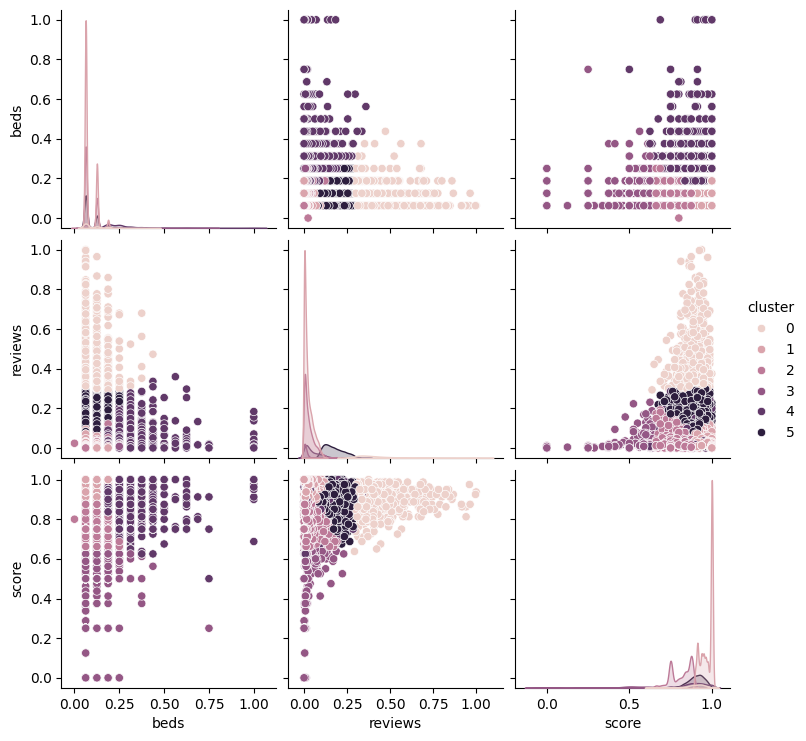

In [ ]:
sns.pairplot(data=Z,hue='cluster')

#Question 5

In [ ]:
Data['cluster'] = model.labels_
Data.loc[:,['price','cluster'] ].groupby('cluster').describe()

# The clusters that have the highest rental prices are by far clusters 1 ($293 per night) and then followed by cluster 0 ($152 per night).

price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
1         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0
4          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
5          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0

#Question 6
Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

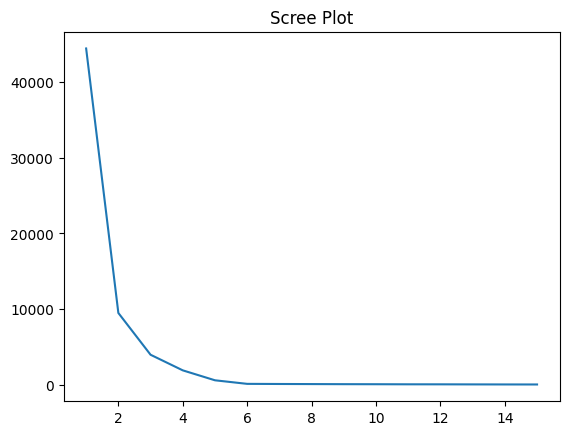

In [ ]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        10512.0  152.233352  147.281729  10.0  85.0  130.0  190.0  10000.0
1         4456.0  139.024461  112.402556  22.0  80.0  120.0  175.0   5000.0
2         7187.0  168.296925  168.483146  20.0  82.0  130.0  199.0   5000.0

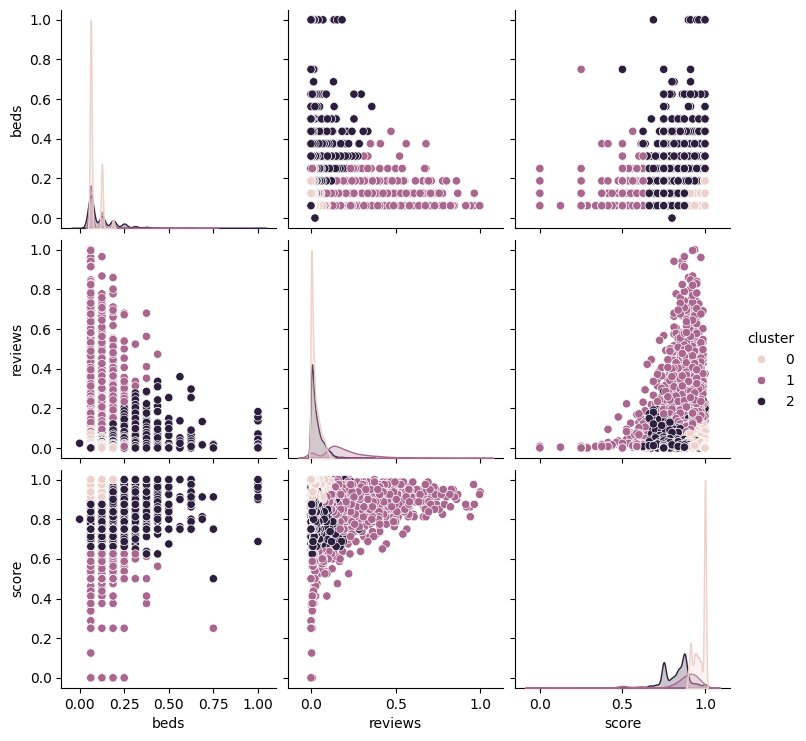

In [ ]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

Data['cluster'] = model.labels_
Data.loc[:,['price','cluster'] ].groupby('cluster').describe()

# The clusters with the highest rental prices are clusters 2 ($168 per night) and cluster 0 ($152 per night).

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

# Question 1

In [ ]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

# Question 2
Make scatterplots of the  (𝑋1,𝑋2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

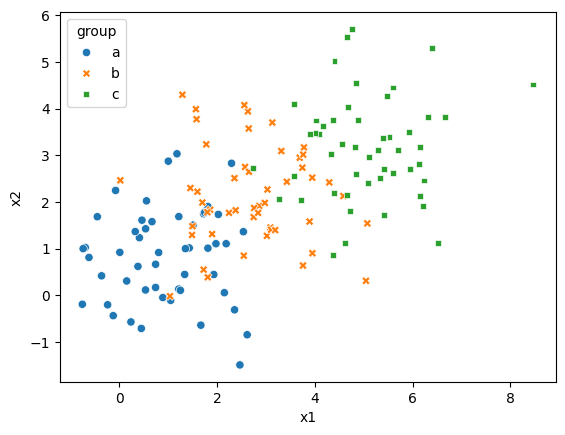

In [ ]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

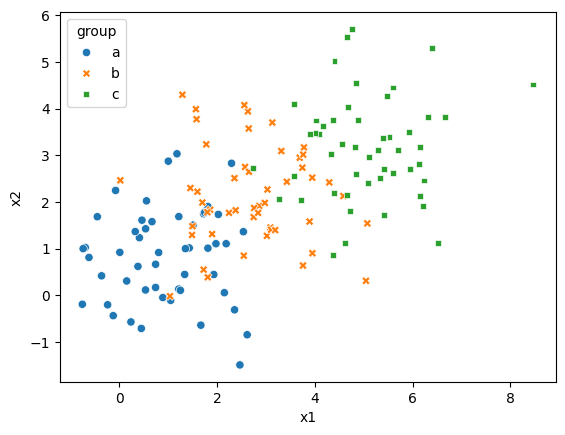

In [ ]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

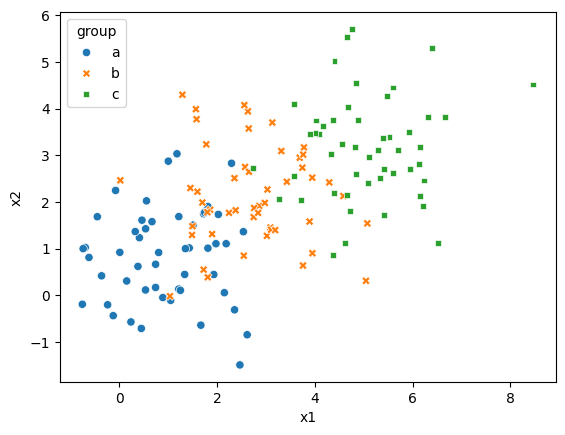

In [ ]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

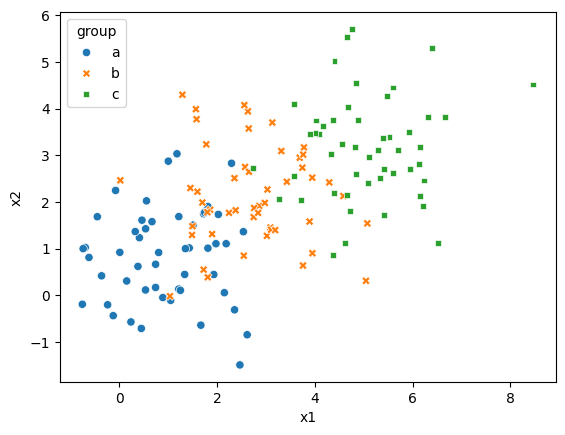

In [ ]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

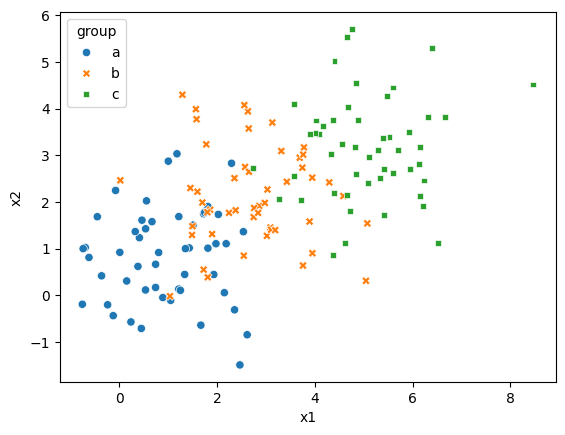

In [ ]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')
# As the noise goes up from 0.125 to 2.00, the clusters become less and less visually distinct. By 2.00, the visual distinctness is practically gone.

# Question 3
Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘 .

In [ ]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data): # I built a function to make scree plots quickly
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

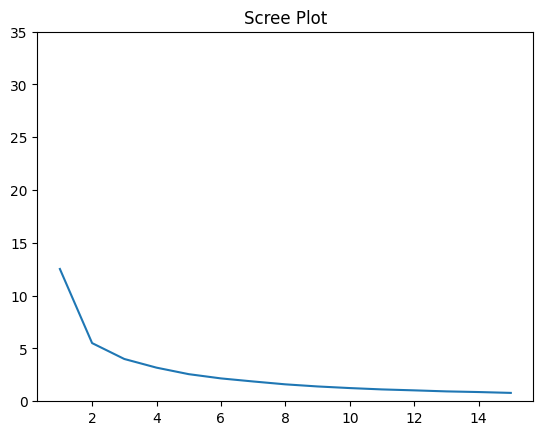

In [ ]:
scree( data = df0_125 )
# There is an elbow at k=2

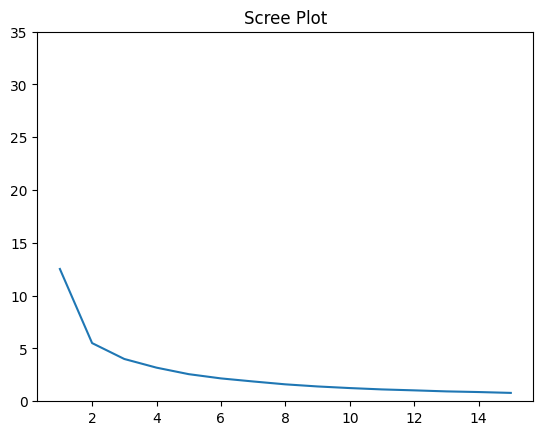

In [ ]:
scree( data = df0_25 )
# There is an elbow at k=2

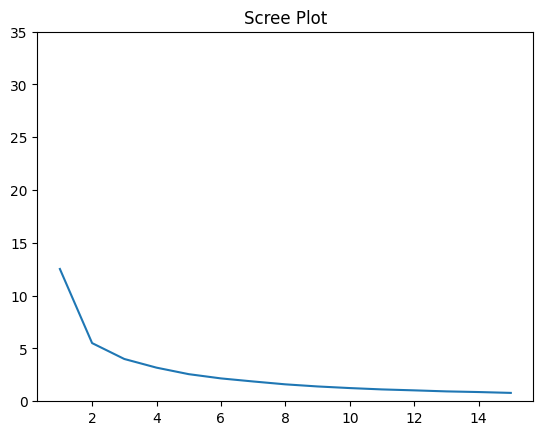

In [ ]:
scree( data = df0_5 )
# There is an elbow at k=2

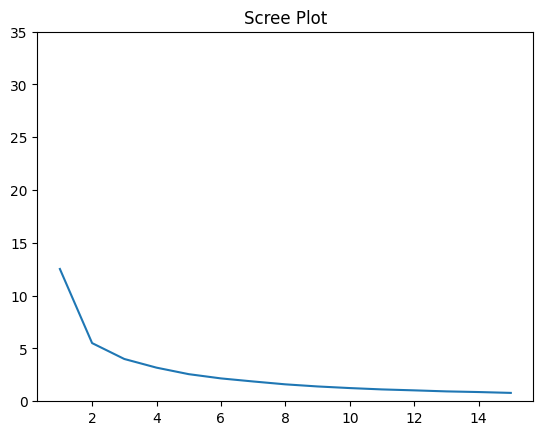

In [ ]:
scree( df2_0 )
# There is an elbow at k=2

# Question 4

If clusters are distinct, then the addition of another cluster will reduce SSE. However, with more noise, the clusters are less distinct and the points will overlap. Using an elbow point where SSE levels is useful in determining how many clusters there are- the elbow indicating when clusters are distinct and a soft elbow demonstrating when clusters are less distinct.